In [3]:
import numpy as np
from sklearn.datasets import make_multilabel_classification, make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [12]:
>>> X, y1 = make_classification(n_samples=10000, n_features=100, n_informative=30, n_classes=3, random_state=1)
>>> y2 = shuffle(y1, random_state=1)
>>> y3 = shuffle(y1, random_state=2)
>>> Y = np.vstack((y1, y2, y3)).T
>>> n_samples, n_features = X.shape # 10,100
>>> n_outputs = Y.shape[1] # 3
>>> n_classes = 3

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [23]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)
y_pred = multi_target_forest.predict(X_test)

In [24]:
multi_target_forest.score(X_test, y_test)

0.0864

---

In [30]:
mlp get_paramsMLPClassifier(random_state=1, max_iter=300)
multi_target_nn = MultiOutputClassifier(mlp, n_jobs=-1)
multi_target_nn.fit(X_train, y_train)
y_pred = multi_target_nn.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
multi_target_nn.score(X_test, y_test)

0.1056

In [31]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

---

In [9]:
import sys
import re
import numpy as np
import pandas as pd
import optuna
import joblib
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])

from sqlalchemy import create_engine
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/zacks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zacks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zacks/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
def tokenize(message, stem='lemm'):
    """Text processing.
    
    Args:
        stem(str): stem or lemm.
        
    Returns:
        list: Cleaned tokens.
    """
    # 1. Cleaning

    # 2. Normalization
    text = re.sub(r"[^a-zA-Z0-9]", " ", message.lower())

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Stop Word Removal
    stop_words = stopwords.words("english")
    tokens = list(filter(lambda w: w not in stop_words, tokens))

    # 5. Part of Speech Tagging / Named Entity Recognition

    # 6. Stemming or Lemmatization
    # Because the targets are not roots, we should use Lemmatization

    clean_tokens = []
    if stem == 'stem':
        stemmer = PorterStemmer()
        for tok in tokens:
            clean_tok = stemmer.stem(tok).strip()
            clean_tokens.append(clean_tok)
    else:
        lemmatizer = WordNetLemmatizer()
        for tok in tokens:
            clean_tok = lemmatizer.lemmatize(tok).strip()
            clean_tokens.append(clean_tok)

    return clean_tokens

In [11]:
model = joblib.load('model.pkl')

In [19]:
def load_data(data_file):
    # read in file
    engine = create_engine(f'sqlite:///{data_file}.db')
    df = pd.read_sql(f'select * from {data_file}', con=engine)

    # define features and label arrays
    X = df.message
    Y = df.loc[:, 'related':]
    target_names = Y.columns
    y = Y.to_numpy()

    return X, y, target_names

X, y, target_names = load_data('disaster_response')

In [20]:
target_names

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [89]:
%%time
pred = model.predict(['I need food', 'I am hungry'])

CPU times: user 10.4 ms, sys: 1.49 ms, total: 11.9 ms
Wall time: 10.7 ms


In [90]:
df = pd.DataFrame(columns=target_names, data=pred)
df

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df[['food']]

,food
0,1
1,1


In [34]:
X

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
                               ...                        
26211    The training demonstrated how to enhance micro...
26212    A suitable candidate has been selected and OCH...
26213    Proshika, operating in Cox's Bazar municipalit...
26214    Some 2,000 women protesting against the conduc...
26215    A radical shift in thinking came about as a re...
Name: message, Length: 26216, dtype: object

In [36]:
'Weather' in X[0]

True

In [94]:
data_file = 'disaster_response'
engine = create_engine(f'sqlite:///{data_file}.db')
df = pd.read_sql(f'select * from {data_file}', con=engine)

In [79]:
df[df.message.str.contains(r'water')].message

7        Please, we need tents and water. We are in Sil...
10       There's nothing to eat and water, we starving ...
12       I am in Thomassin number 32, in the area named...
16       We need food and water in Klecin 12. We are dy...
22       There's a lack of water in Moleya, please info...
                               ...                        
26127    Officials have opened a barrage on the river n...
26144    They will include basic cooking supplies, plat...
26165    One of the first organizations to respond to t...
26168    * Sanitation, (the importance of clean drinkin...
26197    We're providing clean water to people who woul...
Name: message, Length: 2581, dtype: object

In [95]:
len(df[df.message.str.contains(r'food')].index)

2420

In [96]:
len(df[df.message.str.contains(r'hungry')].index)

167

In [102]:
np.intersect1d(, len(df[df.message.str.contains(r'food')].index.to_list()))

array([], dtype=int64)

In [98]:
df[df.message.str.contains(r'hungry')].index

Int64Index([   16,    23,   118,   119,   130,   151,   174,   196,   233,
              391,
            ...
            15702, 17445, 18272, 19140, 22612, 23443, 23666, 23834, 24645,
            25818],
           dtype='int64', length=167)

In [103]:
l1 = df[df.message.str.contains(r'food')].index.to_list()
l2 = df[df.message.str.contains(r'hungry')].index.to_list()

In [107]:
np.intersect1d(l1, l2)

array([   16,    23,   119,   196,   862,  1040,  1464,  1480,  1576,
        1677,  1684,  1769,  1873,  2070,  2549,  2576,  2790,  2812,
        2819,  2831,  2872,  2907,  2947,  3069,  3079,  3749,  3863,
        3889,  4007,  4374,  4941,  5411,  5413,  5428,  6496,  6708,
        6759,  6785,  7078,  7160,  7749,  7937,  8230,  9889, 19140,
       22612])

In [112]:
df[df.message.str.contains(r'[(hungry)(food)]')].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26206, 26207, 26208, 26209, 26210, 26211, 26212, 26213, 26214,
            26215],
           dtype='int64', length=25637)

In [113]:
len(df)

26216

In [16]:
import nltk

In [17]:
nltk.download?

Signature:
nltk.download(
    info_or_id=None,
    download_dir=None,
    quiet=False,
    force=False,
    prefix='[nltk_data] ',
    halt_on_error=True,
    raise_on_error=False,
    print_error_to=<ipykernel.iostream.OutStream object at 0x10bc318e0>,
)
Docstring: <no docstring>
File:      /usr/local/lib/python3.9/site-packages/nltk/downloader.py
Type:      method


In [20]:
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/Users/zacks/nltk_data/tokenizers/punkt/PY3')

In [21]:
nltk.data.find('stem/wordnet')

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mstem/wordnet[0m

  Searched in:
    - '/Users/zacks/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [22]:
nltk.data.find?

Signature: nltk.data.find(resource_name, paths=None)
Docstring:
Find the given resource by searching through the directories and
zip files in paths, where a None or empty string specifies an absolute path.
Returns a corresponding path name.  If the given resource is not
found, raise a ``LookupError``, whose message gives a pointer to
the installation instructions for the NLTK downloader.

Zip File Handling:

  - If ``resource_name`` contains a component with a ``.zip``
    extension, then it is assumed to be a zipfile; and the
    remaining path components are used to look inside the zipfile.

  - If any element of ``nltk.data.path`` has a ``.zip`` extension,
    then it is assumed to be a zipfile.

  - If a given resource name that does not contain any zipfile
    component is not found initially, then ``find()`` will make a
    second attempt to find that resource, by replacing each
    component *p* in the path with *p.zip/p*.  For example, this
    allows ``find()`` to map the reso

In [24]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///disaster_response.db')
df = pd.read_sql_table('disaster_response', engine)

In [25]:
df.message

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
                               ...                        
26211    The training demonstrated how to enhance micro...
26212    A suitable candidate has been selected and OCH...
26213    Proshika, operating in Cox's Bazar municipalit...
26214    Some 2,000 women protesting against the conduc...
26215    A radical shift in thinking came about as a re...
Name: message, Length: 26216, dtype: object

In [44]:
query = df.message.sample(n=1)
query

22332    An additional 115 prefabricated units will be ...
Name: message, dtype: object

In [45]:
list(query)

['An additional 115 prefabricated units will be used for a community center, clinic, fish market, schoolroom, public service offices and warehouses.']

In [38]:
list(df.message.sample(n=1))

["The Prime Minister's Focal Person for Polio Eradication Senator Ayesha Raza Farooq has called upon leading Pakistani paediatricians to play a key role in the country's efforts and goal to eradicate polio once and for all."]

In [36]:
[df.message.sample(n=1)]

[10429    Check this video out RAW VIDEO Haiti Earthquak...
 Name: message, dtype: object]

In [46]:
query

22332    An additional 115 prefabricated units will be ...
Name: message, dtype: object

In [51]:
query.to_string()

'22332    An additional 115 prefabricated units will be ...'

In [52]:
list(query)

['An additional 115 prefabricated units will be used for a community center, clinic, fish market, schoolroom, public service offices and warehouses.']

In [54]:
query.to_list()[0]

'An additional 115 prefabricated units will be used for a community center, clinic, fish market, schoolroom, public service offices and warehouses.'

In [55]:
list('help')

['h', 'e', 'l', 'p']

In [56]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [79]:
from sqlalchemy import create_engine
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import numpy as np
import pandas as pd
import json
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to /Users/zacks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zacks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zacks/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
import re

url_pattern = re.compile(url_regex)

In [62]:
count = 0
for i in df.message:
    if re.findall(url_pattern, i):
        count += 1

In [63]:
print(count)

669


In [64]:
df.shape

(26216, 40)

In [97]:
i = 12
print(df.message[i])
print(re.sub(r"[^a-zA-Z0-9]", " ", df.message[i]))

I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks
I am in Thomassin number 32  in the area named Pyron  I would like to have some water  Thank God we are fine  but we desperately need water  Thanks


In [98]:
text = re.sub(r"[^a-zA-Z0-9]", " ", df.message[i].lower())

In [99]:
tokens = word_tokenize(text)

In [100]:
tokens

['i',
 'am',
 'in',
 'thomassin',
 'number',
 '32',
 'in',
 'the',
 'area',
 'named',
 'pyron',
 'i',
 'would',
 'like',
 'to',
 'have',
 'some',
 'water',
 'thank',
 'god',
 'we',
 'are',
 'fine',
 'but',
 'we',
 'desperately',
 'need',
 'water',
 'thanks']

In [101]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [103]:
[lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words]

['thomassin',
 'number',
 '32',
 'area',
 'named',
 'pyron',
 'would',
 'like',
 'water',
 'thank',
 'god',
 'fine',
 'desperately',
 'need',
 'water',
 'thanks']

In [107]:
import joblib

In [111]:
df[df.message.str.contains('starving')].shape

(53, 40)

In [132]:
d = {'related': 1, 'request': 0, 'offer': 0, 'aid_related': 0, 'medical_help': 0, 'medical_products': 0, 'search_and_rescue': 0, 'security': 0, 'military': 0, 'child_alone': 0, 'water': 0, 'food': 0, 'shelter': 0, 'clothing': 0, 'money': 0, 'missing_people': 0, 'refugees': 0, 'death': 0, 'other_aid': 0, 'infrastructure_related': 0, 'transport': 0, 'buildings': 0, 'electricity': 0, 'tools': 0, 'hospitals': 0, 'shops': 0, 'aid_centers': 0, 'other_infrastructure': 0, 'weather_related': 0, 'floods': 0, 'storm': 0, 'fire': 0, 'earthquake': 0, 'cold': 0, 'other_weather': 0, 'direct_report': 0}

In [115]:
classification_results.keys()

dict_keys(['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report'])

In [ ]:
size = 6

l = []
for i in range(size):
    []

In [119]:
classification_results.items()

dict_items([('related', 1), ('request', 0), ('offer', 0), ('aid_related', 0), ('medical_help', 0), ('medical_products', 0), ('search_and_rescue', 0), ('security', 0), ('military', 0), ('child_alone', 0), ('water', 0), ('food', 0), ('shelter', 0), ('clothing', 0), ('money', 0), ('missing_people', 0), ('refugees', 0), ('death', 0), ('other_aid', 0), ('infrastructure_related', 0), ('transport', 0), ('buildings', 0), ('electricity', 0), ('tools', 0), ('hospitals', 0), ('shops', 0), ('aid_centers', 0), ('other_infrastructure', 0), ('weather_related', 0), ('floods', 0), ('storm', 0), ('fire', 0), ('earthquake', 0), ('cold', 0), ('other_weather', 0), ('direct_report', 0)])

In [123]:
import itertools

In [131]:
dict(itertools.islice(classification_results.items(), 30, 36))

{'storm': 0,
 'fire': 0,
 'earthquake': 0,
 'cold': 0,
 'other_weather': 0,
 'direct_report': 0}

In [145]:
size = 6
start, stop = 0, size

classification_results = []
while stop <= len(d):
    classification_results.append(dict(itertools.islice(d.items(), start, stop)))
    start, stop = stop, stop+6

In [147]:
for row in classification_results:
    print(row)

{'related': 1, 'request': 0, 'offer': 0, 'aid_related': 0, 'medical_help': 0, 'medical_products': 0}
{'search_and_rescue': 0, 'security': 0, 'military': 0, 'child_alone': 0, 'water': 0, 'food': 0}
{'shelter': 0, 'clothing': 0, 'money': 0, 'missing_people': 0, 'refugees': 0, 'death': 0}
{'other_aid': 0, 'infrastructure_related': 0, 'transport': 0, 'buildings': 0, 'electricity': 0, 'tools': 0}
{'hospitals': 0, 'shops': 0, 'aid_centers': 0, 'other_infrastructure': 0, 'weather_related': 0, 'floods': 0}
{'storm': 0, 'fire': 0, 'earthquake': 0, 'cold': 0, 'other_weather': 0, 'direct_report': 0}


In [149]:
for row in classification_results:
    for cell in row.items():
        print(cell)

('related', 1)
('request', 0)
('offer', 0)
('aid_related', 0)
('medical_help', 0)
('medical_products', 0)
('search_and_rescue', 0)
('security', 0)
('military', 0)
('child_alone', 0)
('water', 0)
('food', 0)
('shelter', 0)
('clothing', 0)
('money', 0)
('missing_people', 0)
('refugees', 0)
('death', 0)
('other_aid', 0)
('infrastructure_related', 0)
('transport', 0)
('buildings', 0)
('electricity', 0)
('tools', 0)
('hospitals', 0)
('shops', 0)
('aid_centers', 0)
('other_infrastructure', 0)
('weather_related', 0)
('floods', 0)
('storm', 0)
('fire', 0)
('earthquake', 0)
('cold', 0)
('other_weather', 0)
('direct_report', 0)


In [1]:
from flask import render_template, request, jsonify

In [2]:
import plotly.express as px
import pandas as pd
from sqlalchemy import create_engine

In [3]:
engine = create_engine(
    'sqlite:///disaster_response.db')
df = pd.read_sql_table('disaster_response', engine)

In [12]:
df.columns[4:]

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [13]:
# Count value for each category
_df = pd.DataFrame()
for col in df.columns[4:]:
    _df = pd.concat([_df, df[col].value_counts().to_frame()], axis=1)
# transpose dataframe
_df = _df.transpose()
_df = _df.reset_index()
_df.rename(columns={'index': 'category'}, inplace=True)
# melt dataframe
_df = _df.melt(id_vars='category', var_name='value', value_vars=[1, 2], value_name='counts')
# parse cateory
_df.category = _df.category.str.replace('_', ' ')
_df.category = _df.category.str.capitalize()

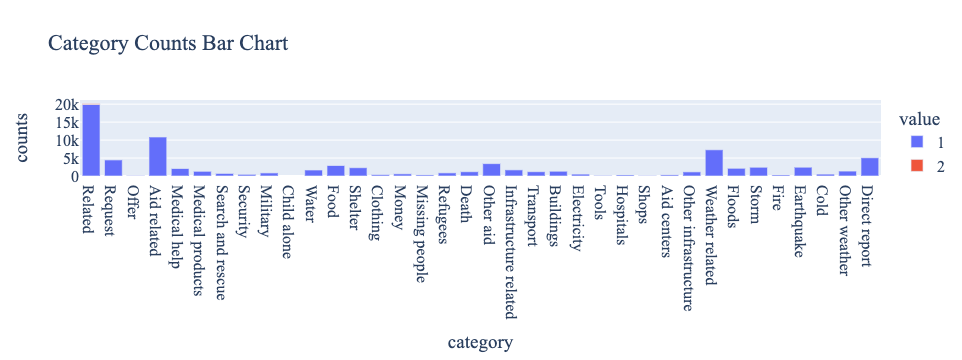

In [18]:
fig = px.bar(
    _df, 
    x='category', 
    y='counts', 
    color='value', 
    title='Category Counts Bar Chart'
)
fig.update_layout(
    autosize=True,
    font_family="Times New Roman",
    font_size=16
)


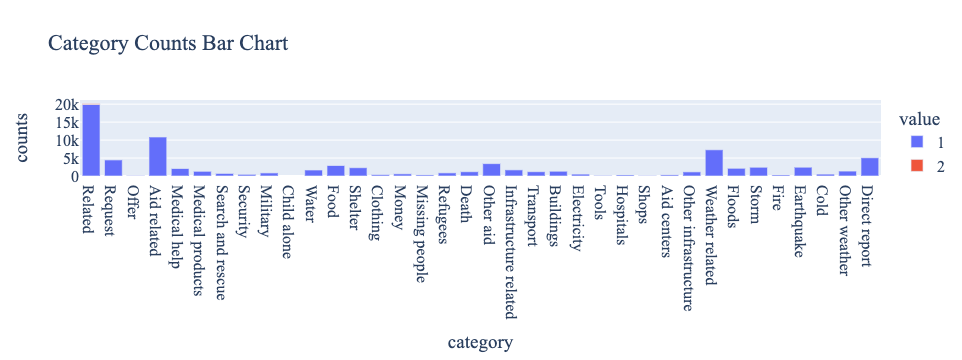

In [19]:
fig.show()

In [43]:
df.groupby('genre')['message'].count().to_frame()

,message
genre,
direct,10766
news,13054
social,2396


In [39]:
df.groupby('genre').count()['message']

genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64

In [81]:
genre_counts = df.groupby('genre').count()['message'].to_frame()
genre_counts = genre_counts.reset_index()

In [82]:
genre_counts

,genre,message
0,direct,10766
1,news,13054
2,social,2396


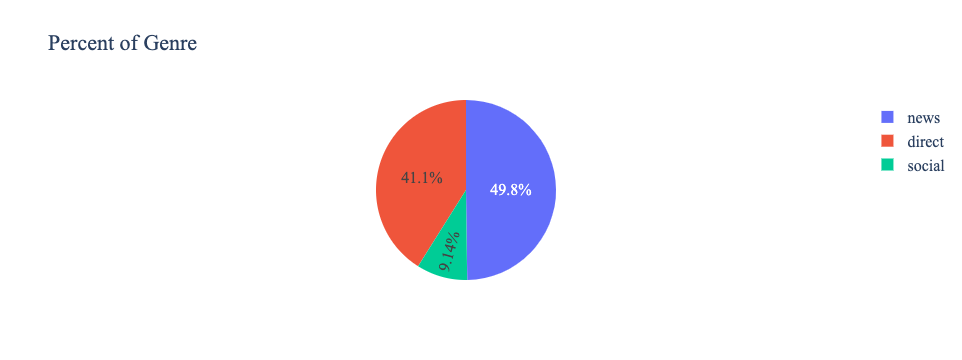

In [60]:
fig = px.pie(
    genre_counts, 
    names='genre', 
    values='message',
    title="Percent of Genre"
)
fig.update_layout(
    autosize=True,
    font_family="Times New Roman",
    font_size=16
)

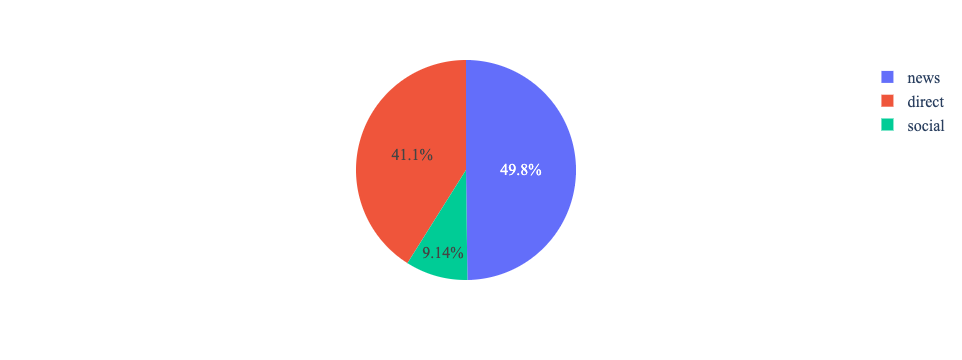

In [59]:
fig.show()

In [61]:
import json

In [70]:
from plotly.graph_objs import Bar
import plotly

In [71]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

# create visuals
# TODO: Below is an example - modify to create your own visuals
graphs = [
    {
        'data': [
            Bar(
                x=genre_names,
                y=genre_counts
            )
        ],

        'layout': {
            'title': 'Distribution of Message Genres',
            'yaxis': {
                'title': "Count"
            },
            'xaxis': {
                'title': "Genre"
            }
        }
    }
]

# encode plotly graphs in JSON
ids = ["graph-{}".format(i) for i, _ in enumerate(graphs)]
graphJSON = json.dumps(graphs, cls=plotly.utils.PlotlyJSONEncoder)

In [73]:
ids

['graph-0']

In [79]:
graphJSON

'[{"data": [{"x": ["direct", "news", "social"], "y": [10766, 13054, 2396], "type": "bar"}], "layout": {"title": "Distribution of Message Genres", "yaxis": {"title": "Count"}, "xaxis": {"title": "Genre"}}}]'

In [83]:
genre_counts

,genre,message
0,direct,10766
1,news,13054
2,social,2396


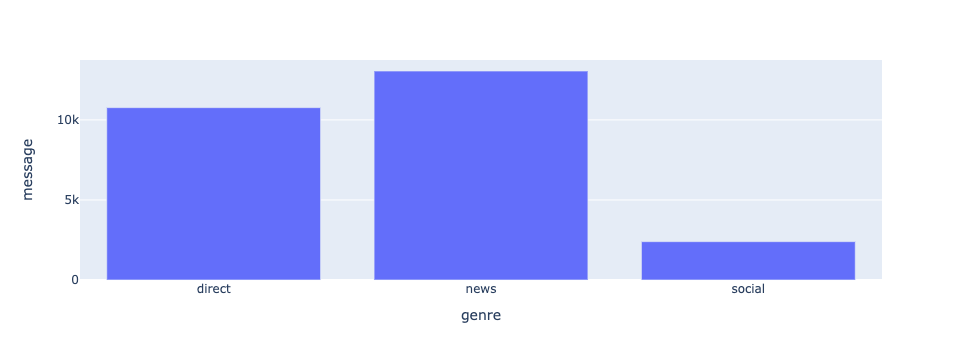

In [84]:
px.bar(genre_counts, x='genre', y='message')

In [10]:
import plotly.graph_objects as go

In [95]:
go.Bar(x=genre_counts.genre, y=genre_counts.message)

Bar({
    'x': array(['direct', 'news', 'social'], dtype=object), 'y': array([10766, 13054,  2396])
})

In [101]:
go.Pie(labels=genre_counts.genre, values=genre_counts.message)

Pie({
    'labels': array(['direct', 'news', 'social'], dtype=object), 'values': array([10766, 13054,  2396])
})

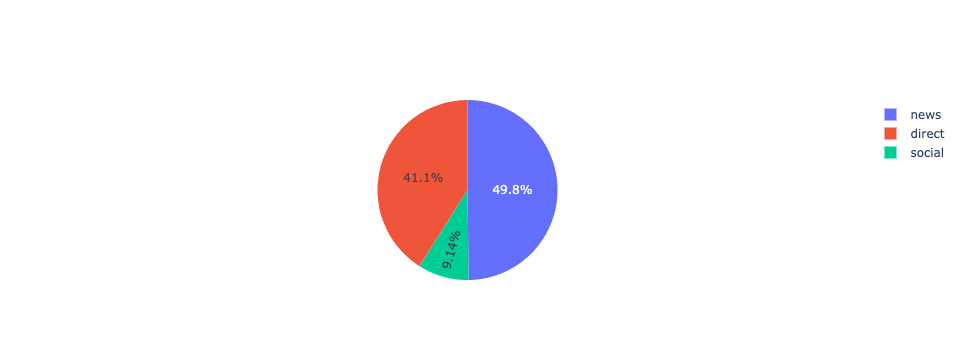

In [102]:
go.Figure(go.Pie(labels=genre_counts.genre, values=genre_counts.message))

In [4]:
category_counts = pd.DataFrame()
for col in df.columns[4:]:
    category_counts = pd.concat([category_counts, df[col].value_counts().to_frame()], axis=1)
# transpose dataframe
category_counts = category_counts.transpose()
category_counts = category_counts.reset_index()
category_counts.rename(columns={'index': 'category'}, inplace=True)
# melt dataframe
category_counts = category_counts.melt(id_vars='category', var_name='value', value_vars=[1, 2], value_name='counts')
# parse category
category_counts.category = category_counts.category.str.replace('_', ' ')
category_counts.category = category_counts.category.str.capitalize()

In [5]:
category_counts

,category,value,counts
0,Related,1,19906.0
1,Request,1,4474.0
2,Offer,1,118.0
3,Aid related,1,10860.0
4,Medical help,1,2084.0
...,...,...,...
67,Fire,2,NaN
68,Earthquake,2,NaN
69,Cold,2,NaN
70,Other weather,2,NaN


In [6]:
import numpy as np

In [7]:
category_counts.counts.replace(np.nan, 0, inplace=True)

In [13]:
fig1 = go.Bar(name='Value 1', x=category_counts.category, y=category_counts[category_counts.value == 1].counts)
fig2 = go.Bar(name='Value 2', x=category_counts.category, y=category_counts[category_counts.value == 2].counts)
data = [fig1, fig2]

layout = dict(title="Genre Counts Bar Chart",
                  font_family="Times New Roman",
                  font_size=16, barmode="stack")

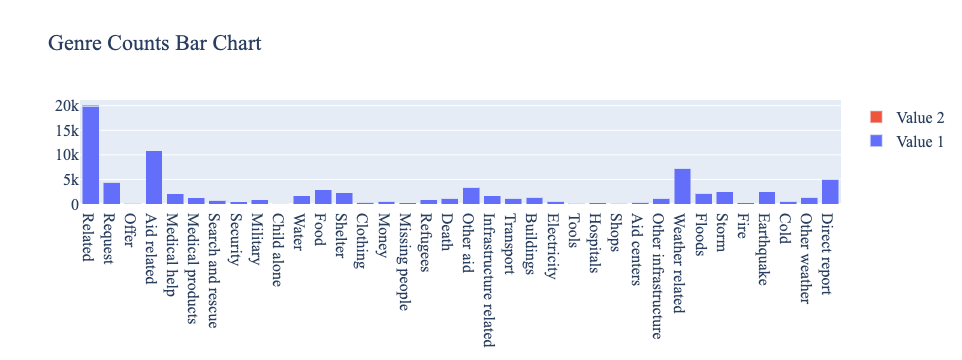

In [14]:
go.Figure(data, layout)

In [125]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,30261,The training demonstrated how to enhance micro...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,30262,A suitable candidate has been selected and OCH...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,30264,"Some 2,000 women protesting against the conduc...",None,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
